In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[5]:


#!/usr/bin/env python
# coding: utf-8

# In[1]:


# imports and define global variables 
import math
import numpy as np
import simpy
from pylab import plot, show, bar
import matplotlib.pyplot as plt

plt.style.use("ggplot")
import random
import simpy
import csv
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
global DayNum
global packageNum
global policy
packageNum = 0
DayNum = 0
policy = 1


def SimulationVisualisation(url):  # Visualisation

    dataset = pd.read_csv(url)
    years = []
    for i in range(500):
        if i > 299:
            years.append(str(i + 0))

    # print(dataset)
    # make list of Dcenters
    continents = []
    for continent in dataset["continent"]:
        if continent not in continents:
            continents.append(continent)
    # make figure
    fig_dict = {
        "data": [],
        "layout": {},
        "frames": []
    }

    # fill in most of layout
    fig_dict["layout"]["xaxis"] = {"range": [0, 6000], "title": "X scale"}
    fig_dict["layout"]["yaxis"] = {"title": "Y scale", "type": "log"}
    fig_dict["layout"]["hovermode"] = "closest"
    fig_dict["layout"]["sliders"] = {
        "args": [
            "transition", {
                "duration": 400,
                "easing": "cubic-in-out"
            }
        ],
        "initialValue": "1952",
        "plotlycommand": "animate",
        "values": years,
        "visible": True
    }
    fig_dict["layout"]["updatemenus"] = [
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 500, "redraw": False},
                                    "fromcurrent": True, "transition": {"duration": 300,
                                                                        "easing": "quadratic-in-out"}}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                      "mode": "immediate",
                                      "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ]

    sliders_dict = {
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Simulation Time(Min):",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": []
    }

    # reorgenise the data to fit innto the points
    year = 0
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == year]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        fig_dict["data"].append(data_dict)

    # make frames
    for year in years:
        frame = {"data": [], "name": str(year)}
        for continent in continents:
            dataset_by_year = dataset[dataset["year"] == int(year)]
            dataset_by_year_and_cont = dataset_by_year[
                dataset_by_year["continent"] == continent]

            data_dict = {
                "x": list(dataset_by_year_and_cont["lifeExp"]),
                "y": list(dataset_by_year_and_cont["gdpPercap"]),
                "mode": "markers",
                "text": list(dataset_by_year_and_cont["country"]),
                "marker": {
                    "sizemode": "area",
                    "sizeref": 200000,
                    "size": list(dataset_by_year_and_cont["pop"])
                },
                "name": continent
            }
            frame["data"].append(data_dict)

        fig_dict["frames"].append(frame)
        slider_step = {"args": [
            [year],
            {"frame": {"duration": 500, "redraw": False},
             "mode": "immediate",
             "transition": {"duration": 300}}
        ],
            "label": year,
            "method": "animate"}
        sliders_dict["steps"].append(slider_step)

    fig_dict["layout"]["sliders"] = [sliders_dict]

    fig = go.Figure(fig_dict)

    fig.show()


'''

'''


def VisalisationCsv(csv_rowlist, originsPoint, destPoint, newPackage):  # used for Visualisation
    # create the points
    number_of_points = 20
    xs = np.linspace(originsPoint[0], destPoint[0], number_of_points + 2)
    ys = np.linspace(originsPoint[1], destPoint[1], number_of_points + 2)
    Intervals = (newPackage.departureBackTime - newPackage.arrivalTime) / number_of_points
    for i in range(len(xs)):
        if newPackage.Dcenter == 0:
            csv_rowlist.append(
                [str(newPackage.Drone) + " " + str(newPackage.id), str(int(newPackage.arrivalTime + Intervals * i)),
                 '10000000', "Dcenter " + str(newPackage.Dcenter), str(int(xs[i])), str(int(ys[i]))])
        if newPackage.Dcenter == 1:
            csv_rowlist.append(
                [str(newPackage.Drone) + " " + str(newPackage.id), str(int(newPackage.arrivalTime + Intervals * i)),
                 '10000000', "Dcenter " + str(newPackage.Dcenter), str(int(xs[i])), str(int(ys[i]))])
        if newPackage.Dcenter == 2:
            csv_rowlist.append(
                [str(newPackage.Drone) + " " + str(newPackage.id), str(int(newPackage.arrivalTime + Intervals * i)),
                 '10000000', "Dcenter " + str(newPackage.Dcenter), str(int(xs[i])), str(int(ys[i]))])
        if newPackage.Dcenter == 3:
            csv_rowlist.append(
                [str(newPackage.Drone) + " " + str(newPackage.id), str(int(newPackage.arrivalTime + Intervals * i)),
                 '10000000', "Dcenter " + str(newPackage.Dcenter), str(int(xs[i])), str(int(ys[i]))])
        if newPackage.Dcenter == 4:
            csv_rowlist.append(
                [str(newPackage.Drone) + " " + str(newPackage.id), str(int(newPackage.arrivalTime + Intervals * i)),
                 '10000000', "Dcenter " + str(newPackage.Dcenter), str(int(xs[i])), str(int(ys[i]))])


class Package(object):  # define class Package
    def __init__(self, env, id):
        global DayNum
        self.env = env
        self.id = id
        self.create_time = env.now
        self.packageSize = random.uniform(0, 1)
        self.location = SortPackages()
        self.patience = env.now + 120  # maximum patience
        self.money = 0
        self.HourlyWage = 0
        self.delivery_time = None
        self.Drone = "No Drone"
        self.createdDay = DayNum
        self.deliveredDay = None
        self.Dcenter = None
        self.departureBackTime = None
        self.arrivalTime = None
        self.arrivalBackTime = None


def SortPackages():  # used o know if to creat package from city center or from the outskirts of the city
    z = np.random.uniform(0, 1)
    if z <= 0.5:  # city center
        x = np.random.uniform(2000, 4000)
        y = np.random.uniform(2000, 4000)
        return (x, y)
    while True:  # The outskirts of the city
        x = np.random.uniform(0, 6000)
        y = np.random.uniform(0, 6000)
        if not (2000 <= x and x < 4000 and 2000 <= y and y < 4000):
            break
    return (x, y)


class Dcenter(object):  # define class distrubtion center
    def __init__(self, env, name, locX, locY,regNum=14,midMun=3,hevNum=1):  # avi_cream
        self.env = env
        self.name = name
        self.reg = simpy.Resource(env, capacity=regNum )
        self.mid = simpy.Resource(env, capacity=midMun )
        self.hev = simpy.Resource(env, capacity=hevNum )
        self.locX = locX
        self.locY = locY


def PolicyOne(DcenterList, new_Package):  # first policy- nearest destribution center
    #print("HI")
    tempDistance = 6000
    minDcenter = 0
    for i in range(len(DcenterList)):
        tempCalc = dis_cac(new_Package.location, DcenterList[i].locX, DcenterList[i].locY)
        if tempCalc < tempDistance:
            tempDistance = tempCalc
            minDcenter = i
    return minDcenter


def PolicyTwo(DcenterList):  # second policy- greatset number of available drones
    tempAvailable = 19
    minDcenter = randint(0, len(DcenterList)-1)
    for i in range(len(DcenterList)):
        countDcenter = 0
        countDcenter += DcenterList[i].reg.count
        countDcenter += DcenterList[i].mid.count
        countDcenter += DcenterList[i].hev.count
        if countDcenter < tempAvailable:
            tempAvailable = countDcenter
            minDcenter = i
    return minDcenter


def PackageCreation(env, DcenterList, PackageDic):  # define class package creation
    global policy
    global DayNum
    global packageNum
    yield env.timeout(300)
    i = 0
    while env.now <= 7200:  # check the time of the sim to creat new events (morning, noon, night)

        if ((DayNum * 1440) + 5 * 60) <= env.now and env.now < ((DayNum * 1440) + 10 * 60):
            eventCreationPase = (np.random.exponential(0.4))  # 2.5
            yield env.timeout(eventCreationPase)
        elif ((DayNum * 1440) + 10 * 60) <= env.now and env.now < ((DayNum * 1440) + 16 * 60):
            eventCreationPase = (np.random.exponential(0.3))  # 3.3333
            yield env.timeout(eventCreationPase)
        elif ((DayNum * 1440) + 16 * 60) <= env.now and env.now < ((DayNum * 1440) + 22 * 60):
            eventCreationPase = np.random.exponential(0.75)
            yield env.timeout(eventCreationPase)
        else:  #
            #
            yield env.timeout(0.5)

        new_Package = Package(env, packageNum)
        packageNum += 1
        PackageDic[packageNum] = new_Package
        new_Package.id = packageNum
        packageSize = new_Package.packageSize
        i += 1
        if policy == 1:  # check which policy in order to refer the order to the right distrbution center
            minCenter = PolicyOne(DcenterList, new_Package)
        else:
            minCenter = PolicyTwo(DcenterList)
        new_Package.Dcenter = minCenter
        env.process(processedPackage(env, packageSize, DcenterList[minCenter], new_Package))
        if ((DayNum * 1440) + 1319) <= env.now:
            yield env.timeout(420)


def processedPackage(env, packageSize, Dcenter, new_Package):  # define class processed package
    if packageSize < 0.6:  # light package
        name = ""
        if Dcenter.reg.count < 14:
            tempDroneRes = Dcenter.reg
            name = "reg"
        elif Dcenter.mid.count < 5:
            tempDroneRes = Dcenter.mid
            name = "mid1"
        else:
            tempDroneRes = Dcenter.reg
            name = "reg2"
    elif 0.6 <= packageSize <= 0.9:  # med package
        name = ""
        if Dcenter.mid.count < 5:
            tempDroneRes = Dcenter.mid
            name = "mid2"
        elif Dcenter.hev.count < 2:
            tempDroneRes = Dcenter.hev
            name = "hev"
        else:
            tempDroneRes = Dcenter.mid
            name = "mid2"
    else:  # heavy package
        tempDroneRes = Dcenter.hev
        name = "hev"
    with tempDroneRes.request() as tempDroneResUse:
        yield tempDroneResUse

        dis = dis_cac(new_Package.location, Dcenter.locX, Dcenter.locY)

        if name == "reg" or name == "reg2":  # drone assigned is light drone
            TempDist = random.uniform(10, 30)
            time = time_cac(dis) + TempDist
            new_Package.delivery_time = env.now + time_cac(dis) / 2 + TempDist
            new_Package.HourlyWage = ((new_Package.delivery_time - new_Package.create_time) / 60) * 100 + (
                        dis / 1000) * 0.01
            new_Package.Drone = name
            new_Package.deliveredDay = DayNum
        elif name == "mid" or name == "mid2":  # drone assigned is reg drone
            TempDist = np.random.exponential(5)
            time = time_cac(dis) + 5 + TempDist
            new_Package.delivery_time = env.now + time_cac(dis) / 2 + 5 + TempDist
            new_Package.HourlyWage = ((new_Package.delivery_time - new_Package.create_time) / 60) * 130 + (
                        dis / 1000) * 0.01
            new_Package.Drone = name
            new_Package.deliveredDay = DayNum
        else:  # drone assigned is super drone
            TempDist = np.random.exponential(10)
            time = time_cac(dis) + 10 + TempDist
            new_Package.delivery_time = env.now + time_cac(dis) / 2 + 10 + TempDist
            new_Package.HourlyWage = ((new_Package.delivery_time - new_Package.create_time) / 60) * 180 + (
                        dis / 1000) * 0.01
            new_Package.deliveredDay = DayNum
            new_Package.Drone = name
        if (new_Package.delivery_time != None):
            temp = new_Package.delivery_time - new_Package.create_time
            if (temp > 120):
                new_Package.money = min((temp - 120)*0.05,50) #פיצוי
        new_Package.departureBackTime = new_Package.delivery_time
        new_Package.arrivalTime = env.now

        yield env.timeout((time))
        new_Package.arrivalBackTime = env.now
        breakDrone = random.uniform(0, 1)
        if (breakDrone < 0.1):  # check for malfunctions
            if name == "reg" or name == "reg2":
                time = random.uniform(1, 3) * 60
            elif name == "mid" or name == "mid2":
                time = np.random.triangular(2, 3, 6) * 60
            else:
                time = np.random.triangular(2, 4, 8) * 60
            yield env.timeout((time))
            new_Package.arrivalBackTime = env.now


def dayAdvance(env):  # skip days forward
    global DayNum
    while True:
        yield env.timeout(1440)
        DayNum += 1


def dis_cac(location, loc1, loc2):  # calculating distances
    distance = 2 * (
        math.sqrt((location[0] - loc1) * (location[0] - loc1) + (location[1] - loc2) * (location[1] - loc2)))
    return distance


def time_cac(distance):  # calculating time
    time = (distance / (500))
    return time


# JS
def autolabel(rects):  # graphs
    """Attach a text label above each bar , displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# used for graphs
allMoneyOwnedListWeeks={'x': range(0, 120)}
allLateDronesListWeeks={'x': range(0, 120)}
allServiceTimeListAllweeks = {'x': range(0, 120)}
#@@@@@@@@@@@@@@@@@@@@@@@@Policy1
RunningWeeksSize=[120]
for week in RunningWeeksSize:
    timesArives = [0 for i in range(20)]
    MoneyOwedPerDay = []
    tempLatePerSimulationlist = []

    # part_2
    allServiceTimeList = []
    MaxForOfek = 0
    FlagVisualisation = False
    csv_rowlist = []
    csv_rowlist.append(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'])
    for i in range(week):  # 100 iterations
        allServiceTimeSum=0
        tempMoneyPerSimulation = 0
        tempLatePerSimulation = 0
        packageNum = 0
        DayNum = 0
        RANDOM_SEED = 100 + i
        SIM_TIME = 10080  # Simulate until
        random.seed(RANDOM_SEED)
        env = simpy.Environment()
        time = []  # list for visualization
        people_in = []  # list for visualization

        Dcenter1 = Dcenter(env, 'Dcenter1', 2000, 2000,14,5,2)
        Dcenter2 = Dcenter(env, 'Dcenter2', 2000, 4000,14,5,2)
        Dcenter3 = Dcenter(env, 'Dcenter3', 4000, 2000,14,5,2)
        Dcenter4 = Dcenter(env, 'Dcenter4', 4000, 4000,14,5,2)
        DcenterList = [Dcenter1, Dcenter2, Dcenter3, Dcenter4]
        #DcenterList = [Dcenter1]
        PackageDic = {}
        env.process(PackageCreation(env, DcenterList, PackageDic))
        env.process(dayAdvance(env))
        env.run(until=SIM_TIME)
        # print(env.now)
        print('Simulation:' + str(i))
        Late_Counter = 0
        None_Counter = 0

        for i in PackageDic.keys():
            if PackageDic[i].deliveredDay != PackageDic[i].createdDay:
                tempLatePerSimulation += 1

            #פה
            if PackageDic[i].delivery_time != None:
                # Visualisation
                if FlagVisualisation == False and PackageDic[i].arrivalTime < 550:
                    # print("Wht.rbt"+str(PackageDic[i].Dcenter))
                    a = DcenterList[PackageDic[i].Dcenter].locX
                    b = DcenterList[PackageDic[i].Dcenter].locY
                    VisalisationCsv(csv_rowlist, (a, b), PackageDic[i].location, PackageDic[i])
                    VisalisationCsv(csv_rowlist, PackageDic[i].location,
                                    (DcenterList[PackageDic[i].Dcenter].locX, DcenterList[PackageDic[i].Dcenter].locY),
                                    PackageDic[i])

                    # פה

                # Visualisation

                tempMoneyPerSimulation += PackageDic[i].money + PackageDic[i].HourlyWage
                temp = PackageDic[i].delivery_time - PackageDic[i].create_time
                allServiceTimeSum+=temp
                if (temp / 60) > MaxForOfek:
                    MaxForOfek = (temp / 60)
                temp = int(temp / 60)
                if temp >= len(timesArives):
                    timesArives[-1] += 1
                else:
                    timesArives[temp] += 1
        allServiceTimeList.append(allServiceTimeSum/len(PackageDic.keys()))
        MoneyOwedPerDay.append(tempMoneyPerSimulation)
        tempLatePerSimulationlist.append(tempLatePerSimulation)
        if (FlagVisualisation == False):
            for k in range(500):
                csv_rowlist.append(['Dcenter1', str(k), '100000000', 'Dcenter', str(2000), str(2000)])
                csv_rowlist.append(['Dcenter2', str(k), '100000000', 'Dcenter', str(2000), str(2000)])
                csv_rowlist.append(['Dcenter3', str(k), '100000000', 'Dcenter', str(4000), str(2000)])
                csv_rowlist.append(['Dcenter4', str(k), '100000000', 'Dcenter', str(4000), str(4000)])
                #csv_rowlist.append(['Dcenter5', str(k), '100000000', 'Dcenter', str(3000), str(3000)])
            with open('SimulationVisualisation_policyOne.csv', 'w') as file:
                writer = csv.writer(file)
                writer.writerows(csv_rowlist)
        FlagVisualisation = True
    allServiceTimeListAllweeks["policy0"]=list(allServiceTimeList)

for i in range(len(timesArives)):
    timesArives[i] = timesArives[i] / 100
notDelivered = []

for i in PackageDic.keys():
    if (PackageDic[i].money > 0):
        Late_Counter += 1
    if (PackageDic[i].delivery_time == None):
        notDelivered.append(PackageDic[i].id)
        None_Counter += 1

timesArives1 = list(timesArives)
allMoneyOwnedListWeeks['policy0']=list(MoneyOwedPerDay)
allLateDronesListWeeks["policy0"]=list(tempLatePerSimulationlist)
notDelivered1 = list(notDelivered)

#@@@@@@@@@@@@@@@@@@@@@@@@Policy1
RunningWeeksSize=[120]
for week in RunningWeeksSize:
    timesArives = [0 for i in range(20)]
    MoneyOwedPerDay = []
    tempLatePerSimulationlist = []

    # part_2
    allServiceTimeList = []
    MaxForOfek = 0
    FlagVisualisation = False
    csv_rowlist = []
    csv_rowlist.append(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'])
    for i in range(week):  # 100 iterations
        allServiceTimeSum=0
        tempMoneyPerSimulation = 0
        tempLatePerSimulation = 0
        packageNum = 0
        DayNum = 0
        RANDOM_SEED = 100 + i
        SIM_TIME = 10080  # Simulate until
        random.seed(RANDOM_SEED)
        env = simpy.Environment()
        time = []  # list for visualization
        people_in = []  # list for visualization

        Dcenter1 = Dcenter(env, 'Dcenter1', 2000, 2000,13) #regNum=14,midMun=3,hevNum=1
        Dcenter2 = Dcenter(env, 'Dcenter2', 2000, 4000,12)
        Dcenter3 = Dcenter(env, 'Dcenter3', 4000, 2000,12)
        Dcenter4 = Dcenter(env, 'Dcenter4', 4000, 4000,13,2)
        Dcenter5 = Dcenter(env, 'Dcenter5', 3000, 3000)
        DcenterList=[Dcenter1,Dcenter2,Dcenter3,Dcenter4,Dcenter5]
        #DcenterList = [Dcenter1]
        PackageDic = {}
        env.process(PackageCreation(env, DcenterList, PackageDic))
        env.process(dayAdvance(env))
        env.run(until=SIM_TIME)
        # print(env.now)
        print('Simulation:' + str(i))
        Late_Counter = 0
        None_Counter = 0

        for i in PackageDic.keys():
            if PackageDic[i].deliveredDay != PackageDic[i].createdDay:
                tempLatePerSimulation += 1

            #פה
            if PackageDic[i].delivery_time != None:
                # Visualisation
                if FlagVisualisation == False and PackageDic[i].arrivalTime < 550:
                    # print("Wht.rbt"+str(PackageDic[i].Dcenter))
                    a = DcenterList[PackageDic[i].Dcenter].locX
                    b = DcenterList[PackageDic[i].Dcenter].locY
                    VisalisationCsv(csv_rowlist, (a, b), PackageDic[i].location, PackageDic[i])
                    VisalisationCsv(csv_rowlist, PackageDic[i].location,
                                    (DcenterList[PackageDic[i].Dcenter].locX, DcenterList[PackageDic[i].Dcenter].locY),
                                    PackageDic[i])

                    # פה

                # Visualisation

                tempMoneyPerSimulation += PackageDic[i].money + PackageDic[i].HourlyWage
                temp = PackageDic[i].delivery_time - PackageDic[i].create_time
                allServiceTimeSum+=temp
                if (temp / 60) > MaxForOfek:
                    MaxForOfek = (temp / 60)
                temp = int(temp / 60)
                if temp >= len(timesArives):
                    timesArives[-1] += 1
                else:
                    timesArives[temp] += 1
        allServiceTimeList.append(allServiceTimeSum/len(PackageDic.keys()))
        MoneyOwedPerDay.append(tempMoneyPerSimulation)
        tempLatePerSimulationlist.append(tempLatePerSimulation)
        if (FlagVisualisation == False):
            for k in range(500):
                csv_rowlist.append(['Dcenter1', str(k), '100000000', 'Dcenter', str(2000), str(2000)])
                csv_rowlist.append(['Dcenter2', str(k), '100000000', 'Dcenter', str(2000), str(2000)])
                csv_rowlist.append(['Dcenter3', str(k), '100000000', 'Dcenter', str(4000), str(2000)])
                csv_rowlist.append(['Dcenter4', str(k), '100000000', 'Dcenter', str(4000), str(4000)])
                csv_rowlist.append(['Dcenter5', str(k), '100000000', 'Dcenter', str(3000), str(3000)])
            with open('SimulationVisualisation_policyOne.csv', 'w') as file:
                writer = csv.writer(file)
                writer.writerows(csv_rowlist)
        FlagVisualisation = True
    allServiceTimeListAllweeks["policy1"]=list(allServiceTimeList)

for i in range(len(timesArives)):
    timesArives[i] = timesArives[i] / 100
notDelivered = []

for i in PackageDic.keys():
    if (PackageDic[i].money > 0):
        Late_Counter += 1
    if (PackageDic[i].delivery_time == None):
        notDelivered.append(PackageDic[i].id)
        None_Counter += 1

timesArives1 = list(timesArives)
allMoneyOwnedListWeeks['policy1']=list(MoneyOwedPerDay)
allLateDronesListWeeks["policy1"]=list(tempLatePerSimulationlist)
notDelivered1 = list(notDelivered)

#@@@@@@@@@@@@@@@@@@@@@@@@Policy2

RunningWeeksSize=[120]
for week in RunningWeeksSize:
    timesArives = [0 for i in range(20)]
    MoneyOwedPerDay = []
    tempLatePerSimulationlist = []

    # part_2
    allServiceTimeList = []
    MaxForOfek = 0
    FlagVisualisation = False
    csv_rowlist = []
    csv_rowlist.append(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'])
    for i in range(week):  # 100 iterations
        allServiceTimeSum=0
        tempMoneyPerSimulation = 0
        tempLatePerSimulation = 0
        packageNum = 0
        DayNum = 0
        RANDOM_SEED = 100 + i
        SIM_TIME = 10080  # Simulate until
        random.seed(RANDOM_SEED)
        env = simpy.Environment()
        time = []  # list for visualization
        people_in = []  # list for visualization

        Dcenter1 = Dcenter(env, 'Dcenter1', 2727, 1636,22,6,3)
        Dcenter2 = Dcenter(env, 'Dcenter2', 1636, 4636,22,6,3)
        Dcenter3 = Dcenter(env, 'Dcenter3', 4636, 3545,22,6,3)
        #Dcenter4 = Dcenter(env, 'Dcenter4', 4000, 4000,13,2)
        #Dcenter5 = Dcenter(env, 'Dcenter5', 3000, 3000)
        DcenterList=[Dcenter1,Dcenter2,Dcenter3]
        #DcenterList = [Dcenter1]
        PackageDic = {}
        env.process(PackageCreation(env, DcenterList, PackageDic))
        env.process(dayAdvance(env))
        env.run(until=SIM_TIME)
        # print(env.now)
        print('Simulation:' + str(i))
        Late_Counter = 0
        None_Counter = 0

        for i in PackageDic.keys():
            if PackageDic[i].deliveredDay != PackageDic[i].createdDay:
                tempLatePerSimulation += 1

            #פה
            if PackageDic[i].delivery_time != None:
                # Visualisation
                if FlagVisualisation == False and PackageDic[i].arrivalTime < 550:
                    # print("Wht.rbt"+str(PackageDic[i].Dcenter))
                    a = DcenterList[PackageDic[i].Dcenter].locX
                    b = DcenterList[PackageDic[i].Dcenter].locY
                    VisalisationCsv(csv_rowlist, (a, b), PackageDic[i].location, PackageDic[i])
                    VisalisationCsv(csv_rowlist, PackageDic[i].location,
                                    (DcenterList[PackageDic[i].Dcenter].locX, DcenterList[PackageDic[i].Dcenter].locY),
                                    PackageDic[i])

                    # פה

                # Visualisation

                tempMoneyPerSimulation += PackageDic[i].money + PackageDic[i].HourlyWage
                temp = PackageDic[i].delivery_time - PackageDic[i].create_time
                allServiceTimeSum+=temp
                if (temp / 60) > MaxForOfek:
                    MaxForOfek = (temp / 60)
                temp = int(temp / 60)
                if temp >= len(timesArives):
                    timesArives[-1] += 1
                else:
                    timesArives[temp] += 1
        allServiceTimeList.append(allServiceTimeSum/len(PackageDic.keys()))
        MoneyOwedPerDay.append(tempMoneyPerSimulation)
        tempLatePerSimulationlist.append(tempLatePerSimulation)
        if (FlagVisualisation == False):
            for k in range(500):
                csv_rowlist.append(['Dcenter1', str(k), '100000000', 'Dcenter', str(2000), str(2000)])
                csv_rowlist.append(['Dcenter2', str(k), '100000000', 'Dcenter', str(2000), str(2000)])
                csv_rowlist.append(['Dcenter3', str(k), '100000000', 'Dcenter', str(4000), str(2000)])
                csv_rowlist.append(['Dcenter4', str(k), '100000000', 'Dcenter', str(4000), str(4000)])
                csv_rowlist.append(['Dcenter5', str(k), '100000000', 'Dcenter', str(3000), str(3000)])
            with open('SimulationVisualisation_policyOne.csv', 'w') as file:
                writer = csv.writer(file)
                writer.writerows(csv_rowlist)
        FlagVisualisation = True
    allServiceTimeListAllweeks["policy2"]=list(allServiceTimeList)
for i in range(len(timesArives)):
    timesArives[i] = timesArives[i] / 100
notDelivered = []

for i in PackageDic.keys():
    if (PackageDic[i].money > 0):
        Late_Counter += 1
    if (PackageDic[i].delivery_time == None):
        notDelivered.append(PackageDic[i].id)
        None_Counter += 1

timesArives1 = list(timesArives)
allMoneyOwnedListWeeks['policy2']=list(MoneyOwedPerDay)
allLateDronesListWeeks["policy2"]=list(tempLatePerSimulationlist)
notDelivered1 = list(notDelivered)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@Policy 3
RunningWeeksSize=[120]
for week in RunningWeeksSize:
    timesArives = [0 for i in range(20)]
    MoneyOwedPerDay = []
    tempLatePerSimulationlist = []

    # part_2
    allServiceTimeList = []
    MaxForOfek = 0
    FlagVisualisation = False
    csv_rowlist = []
    csv_rowlist.append(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'])
    for i in range(week):  # 100 iterations
        allServiceTimeSum=0
        tempMoneyPerSimulation = 0
        tempLatePerSimulation = 0
        packageNum = 0
        DayNum = 0
        RANDOM_SEED = 100 + i
        SIM_TIME = 10080  # Simulate until
        random.seed(RANDOM_SEED)
        env = simpy.Environment()
        time = []  # list for visualization
        people_in = []  # list for visualization

        Dcenter1 = Dcenter(env, 'Dcenter1', 2000, 2000,14,7,1)
        Dcenter2 = Dcenter(env, 'Dcenter2', 2000, 4000,14,7,1)
        Dcenter3 = Dcenter(env, 'Dcenter3', 4000, 2000,14,7,1)
        Dcenter4 = Dcenter(env, 'Dcenter4', 4000, 4000,14,7,1)
        #Dcenter5 = Dcenter(env, 'Dcenter5', 3000, 3000)
        DcenterList=[Dcenter1,Dcenter2,Dcenter3,Dcenter4]
        #DcenterList = [Dcenter1]
        PackageDic = {}
        env.process(PackageCreation(env, DcenterList, PackageDic))
        env.process(dayAdvance(env))
        env.run(until=SIM_TIME)
        # print(env.now)
        print('Simulation:' + str(i))
        Late_Counter = 0
        None_Counter = 0

        for i in PackageDic.keys():
            if PackageDic[i].deliveredDay != PackageDic[i].createdDay:
                tempLatePerSimulation += 1

            #פה
            if PackageDic[i].delivery_time != None:
                # Visualisation
                if FlagVisualisation == False and PackageDic[i].arrivalTime < 550:
                    # print("Wht.rbt"+str(PackageDic[i].Dcenter))
                    a = DcenterList[PackageDic[i].Dcenter].locX
                    b = DcenterList[PackageDic[i].Dcenter].locY
                    VisalisationCsv(csv_rowlist, (a, b), PackageDic[i].location, PackageDic[i])
                    VisalisationCsv(csv_rowlist, PackageDic[i].location,
                                    (DcenterList[PackageDic[i].Dcenter].locX, DcenterList[PackageDic[i].Dcenter].locY),
                                    PackageDic[i])

                    # פה

                # Visualisation

                tempMoneyPerSimulation += PackageDic[i].money + PackageDic[i].HourlyWage
                temp = PackageDic[i].delivery_time - PackageDic[i].create_time
                allServiceTimeSum+=temp
                if (temp / 60) > MaxForOfek:
                    MaxForOfek = (temp / 60)
                temp = int(temp / 60)
                if temp >= len(timesArives):
                    timesArives[-1] += 1
                else:
                    timesArives[temp] += 1
        allServiceTimeList.append(allServiceTimeSum/len(PackageDic.keys()))
        MoneyOwedPerDay.append(tempMoneyPerSimulation)
        tempLatePerSimulationlist.append(tempLatePerSimulation)
        if (FlagVisualisation == False):
            for k in range(500):
                csv_rowlist.append(['Dcenter1', str(k), '100000000', 'Dcenter', str(2000), str(2000)])
                csv_rowlist.append(['Dcenter2', str(k), '100000000', 'Dcenter', str(2000), str(2000)])
                csv_rowlist.append(['Dcenter3', str(k), '100000000', 'Dcenter', str(4000), str(2000)])
                csv_rowlist.append(['Dcenter4', str(k), '100000000', 'Dcenter', str(4000), str(4000)])
                csv_rowlist.append(['Dcenter5', str(k), '100000000', 'Dcenter', str(3000), str(3000)])
            with open('SimulationVisualisation_policyOne.csv', 'w') as file:
                writer = csv.writer(file)
                writer.writerows(csv_rowlist)
        FlagVisualisation = True
    allServiceTimeListAllweeks["policy3"]=list(allServiceTimeList)
for i in range(len(timesArives)):
    timesArives[i] = timesArives[i] / 100
notDelivered = []

for i in PackageDic.keys():
    if (PackageDic[i].money > 0):
        Late_Counter += 1
    if (PackageDic[i].delivery_time == None):
        notDelivered.append(PackageDic[i].id)
        None_Counter += 1

timesArives1 = list(timesArives)
allMoneyOwnedListWeeks['policy3']=list(MoneyOwedPerDay)
allLateDronesListWeeks["policy3"]=list(tempLatePerSimulationlist)
notDelivered1 = list(notDelivered)





csv_rowlist_part2=[["iteration", "delivery_time", "policy"]]

counterPolicy=0
DictonaryPolicy={}
for WeekData in allServiceTimeListAllweeks:
    counterPolicy+=1
    for k in range(len(WeekData)):
        csv_rowlist_part2.append([str(k), str(WeekData[k]),str("policy"+str(counterPolicy))])
        if counterPolicy in DictonaryPolicy.keys():
            DictonaryPolicy[counterPolicy].append(WeekData[k])
        else:
            DictonaryPolicy[counterPolicy]=[WeekData[k]]
csv_rowlist_For_Rabas=[["policy1", "policy2", "policy3"]]

with open('Anova.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(csv_rowlist_part2)
#print (DictonaryPolicy)

#***************************part_2 Graphs


Simulation:0
Simulation:1
Simulation:2
Simulation:3
Simulation:4
Simulation:5
Simulation:6
Simulation:7
Simulation:8
Simulation:9
Simulation:10
Simulation:11
Simulation:12
Simulation:13
Simulation:14
Simulation:15
Simulation:16
Simulation:17
Simulation:18
Simulation:19
Simulation:20
Simulation:21
Simulation:22
Simulation:23
Simulation:24
Simulation:25
Simulation:26
Simulation:27
Simulation:28
Simulation:29
Simulation:30
Simulation:31
Simulation:32
Simulation:33
Simulation:34
Simulation:35
Simulation:36
Simulation:37
Simulation:38
Simulation:39
Simulation:40
Simulation:41
Simulation:42
Simulation:43
Simulation:44
Simulation:45
Simulation:46
Simulation:47
Simulation:48
Simulation:49
Simulation:50
Simulation:51
Simulation:52
Simulation:53
Simulation:54
Simulation:55
Simulation:56
Simulation:57
Simulation:58
Simulation:59
Simulation:60
Simulation:61
Simulation:62
Simulation:63
Simulation:64
Simulation:65
Simulation:66
Simulation:67
Simulation:68
Simulation:69
Simulation:70
Simulation:71
Si

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

policy0: 
Average expense per week: 6061818.668479598
Average of over a day late drones per week: 1287.9
Average duration of delivery per week: 204.89601790873778
policy1: 
Average expense per week: 18695707.88763065
Average of over a day late drones per week: 3927.775
Average duration of delivery per week: 622.7671155383358
policy2: 
Average expense per week: 10234008.900166146
Average of over a day late drones per week: 2163.258333333333
Average duration of delivery per week: 364.3584929545598
policy3: 
Average expense per week: 10298012.89430939
Average of over a day late drones per week: 3377.9
Average duration of delivery per week: 291.169957459824


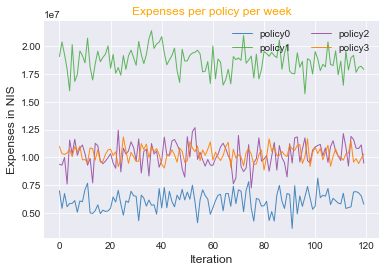

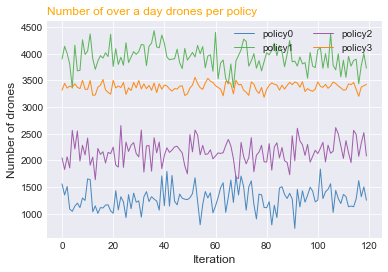

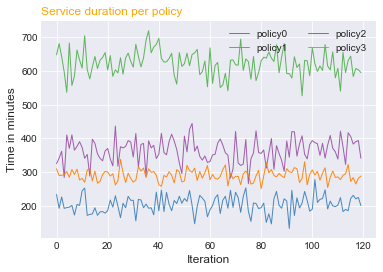

policy0: 
Average expense per week: 6061818.668479598
Average of over a day late drones per week: 1287.9
Average duration of delivery per week: 204.89601790873778
policy1: 
Average expense per week: 18695707.88763065
Average of over a day late drones per week: 3927.775
Average duration of delivery per week: 622.7671155383358
policy2: 
Average expense per week: 10234008.900166146
Average of over a day late drones per week: 2163.258333333333
Average duration of delivery per week: 364.3584929545598
policy3: 
Average expense per week: 10298012.89430939
Average of over a day late drones per week: 3377.9
Average duration of delivery per week: 291.169957459824


In [13]:
#***************************part_2 Graphs
# Make a data frame
df = pd.DataFrame(allMoneyOwnedListWeeks)
# style
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot
num = 0
for column in df.drop('x', axis=1):
    num += 1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=0, ncol=2)

# Add titles
plt.title("Expenses per policy per week", loc='center', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Iteration")
plt.ylabel("Expenses in NIS")
plt.show()

#$$$$$$$$$$$$$$$$$$$$$$$$LATE Graph
#***************************part_2 Graphs
# Make a data frame
df = pd.DataFrame(allLateDronesListWeeks)
# style
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot
num = 0
for column in df.drop('x', axis=1):
    num += 1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=1, ncol=2)

# Add titles
plt.title("Number of over a day drones per policy", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Iteration")
plt.ylabel("Number of drones")
plt.show()

#$$$$$$$$$$$$$$$$$$$$$$$$Duration Graph
#***************************part_2 Graphs
# Make a data frame
df = pd.DataFrame(allServiceTimeListAllweeks)
# style
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot
num = 0
for column in df.drop('x', axis=1):
    num += 1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=0, ncol=2)

# Add titles
plt.title("Service duration per policy", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Iteration")
plt.ylabel("Time in minutes")
plt.show()


for key in allMoneyOwnedListWeeks.keys():
    if key == 'x':
        continue
    if key == 'policy0':
        print(str(key) + ': ')
        print("Average expense per week: " + str(sum(allMoneyOwnedListWeeks[key][:120]) / 120))
        print("Average of over a day late drones per week: " + str(sum(allLateDronesListWeeks[key][:120]) / 120))
        print("Average duration of delivery per week: " + str(sum(allServiceTimeListAllweeks[key][:120]) / 120))
    else:
        print(str(key) +': ')
        print("Average expense per week: "+str(sum(allMoneyOwnedListWeeks[key])/120))
        print("Average of over a day late drones per week: "+str(sum(allLateDronesListWeeks[key])/120))
        print("Average duration of delivery per week: "+str(sum(allServiceTimeListAllweeks[key])/120))

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import f
import csv

def ssd(ser):
    '''
    Function ssd(): computes the sum of squared deviates for a Series object
    
    > Input parameters:
    - ser: the Series object
    
    > Returns:
    - The sum of squared deviates computed as Σ(x)**2 - ((Σx)**2)/N  
    '''
    ser.dropna(axis=0, inplace=True)     # Clear Series from null values 'in place'
    s1 = pow(ser,2).sum()
    s2 = pow(ser.sum(),2) / ser.size
    return s1-s2


def dftoser(df):
    '''
    Function dftoser(): converts a DataFrame to a Series appending all columns in place
    
    > Input parameters:
    - df: the DataFrame object to be converted
    
    > Returns:
    - A Series object containing all DataFrame columns one after another    
    '''
    # Clear DataFrame from null values 'in place' and possibly drop 'all NaN' rows or columns
    df.dropna(axis=(0,1),how='all',inplace=True)   
    
    ser = pd.Series()
    for i in range(len(df.columns)):
        ser = ser.append(df.iloc[:,i])
    return ser


def ptl_anovaR(inframe):                  
    '''
    Function:  ptl_anovaR() for performing repeated measures one way anova on input data
    
    > Input parameters:
    - inframe: pandas DataFrame with data groups in columns (one column for each group)
    
    > Returns:
    - F: the F statistic for the input data
    - p: the p probability for statistical significance
    '''
    

    # Number of rows and columns in the input DataFrame
    rows, cols = inframe.shape
    k = cols                     # Columns are also equal to the different groups k
    n_sbj = rows                 # Rows are also equal to the umber of different subjects n_sbj
    
    # Convert dataframe to a series object
    allser = dftoser(inframe)
    n_t = allser.size            # n_t is the total number of data (measurements) 
    
    
    # Compute ss_t (sum of squared deviates for the whole data set)
    ss_t = ssd(allser)
    
    
    # Compute ss_wg as sum of ss for all sample groups ( = columns in the 'inframe' DataFrame)
    ss_wg = 0
    for i in range(k):
        ss_wg += ssd(inframe.iloc[:,i])
    
    # OK Compute ss_bg by subtracking ss_wg from ss_t
    ss_bg = ss_t - ss_wg
    
    # Construct a new Series object: "subjectmeans" (contains the means for each subject data)  
    subjmeans = pd.Series([0 for i in range(rows)])
    for i in range(rows):
        sm = inframe.iloc[i,:].mean(skipna=True)
        subjmeans.iloc[i] = sm
    
    # Compute ss_sb as the weighed (by groups) ssd for the subjmeans object 
    ss_sb = k*ssd(subjmeans)
    ss_er = ss_wg - ss_sb
    
    # degrees of freedom
    df_t = n_t - 1
    df_bg = k - 1
    df_wg = n_t - k
    df_sb = n_sbj - 1 
    df_er = df_wg - df_sb
    
    ms_bg = ss_bg / df_bg
    ms_er = ss_er / df_er
    
    F = ms_bg / ms_er
    p = f.sf(F, df_bg, df_er, loc=0, scale=1)
    
    # Printouts
    print('Between groups (effect):\t SS_bg = {:8.4f}, \t df_bg = {:3d}, \t MS_bg = {:8.4f}'.format(ss_bg, df_bg, ms_bg))
    print('          Within groups:\t SS_wg = {:8.4f}, \t df_wg = {:3d}'.format(ss_wg, df_wg))
    print('                  Error:\t SS_er = {:8.4f}, \t df_er = {:3d}, \t MS_er = {:8.4f}'.format(ss_er, df_er, ms_er))
    print('               Subjects:\t SS_sb = {:8.4f}, \t df_sb = {:3d}'.format(ss_sb, df_sb))
    print('                  TOTAL:\t  SS_t = {:8.4f}, \t  df_t = {:3d}'.format(ss_t, df_t))
    print('F = {:8.4f}, p = {:8.4f}'.format(F, p)) 
    
    return F, p


# Main ========================================================================
testdata={'1': [603.7281265444085, 642.9247515957313, 582.1852239146491, 588.1674520945154, 653.8896263865163, 669.0976226377516, 633.7334901229315, 621.7976506377332, 631.8870437203709, 614.9715791378156, 588.873934109095, 582.2847393746786, 614.6732206303603, 535.6169847539381, 640.1148748393755, 675.1772575009873, 584.6282923556215, 676.0629470609416, 594.8535894731016, 627.759127835027, 637.0488248438568, 676.4657257359313, 611.7907148674774, 605.3238907054213, 603.8387735127649, 575.8333527835099, 569.20781533396, 643.5949126907502, 608.1231310110704, 582.8359386776657, 580.0680968829143, 646.4210141196005, 624.8386133393527, 663.6054685720346, 602.5484258804878, 655.2694950981455, 651.4724483255053, 640.001975550851, 577.926902742012, 694.3982559142299, 689.5170136889857, 576.0462487025733, 628.4282260900003, 644.6148329883749, 590.3255384452285, 649.159057229322, 604.8639956490523, 672.2366316215421, 591.684937203161, 659.8179907933846, 574.3566669246587, 674.3104708902662, 719.9161516683716, 640.6505825643347, 664.4187955690277, 631.7766122425529, 731.1994496316107, 549.7904057598007, 710.0356005131613, 607.8715413619394, 655.9342820122889, 571.4161699874065, 540.509553931229, 653.0681770266656, 605.6218506743294, 584.1257107112654, 732.2674531893524, 617.5242041050046, 647.5864671447797, 650.3883478389996, 662.1105426408197, 621.9866283843139, 647.9538541625762, 627.5967026406746, 614.317763949681, 584.4115023731622, 634.3954215975024, 632.4412634975536, 620.6710323623366, 639.2960518911572, 580.7437932300263, 651.3580757787641, 576.1244069441128, 626.2170046677539, 629.2374127209449, 607.4240357302621, 616.2973842988345, 652.5072121075992, 584.5621935006699, 624.5906072189422, 658.6782681008633, 676.8535882767285, 659.160888284965, 667.7353666971511, 563.0184294638079, 626.3137770164101, 598.8753872633096, 613.0467013550592, 575.4518688287469, 617.0079959832048, 675.3893168371103, 671.24918087167, 609.9654110034237, 553.8501795480662, 626.9226408250273, 591.6440461321461, 663.0649491716929, 673.1231464882164, 583.5187581271963, 539.1539399746846, 639.8911270332483, 644.1318392590795, 614.4169014619814, 586.4580512013305, 590.6347180469893, 538.2676447216797, 595.651941376666, 596.0273576093562, 680.2335416109171, 632.6339859281136], '2': [364.25359127221907, 342.728575041635, 333.68996352276645, 387.4646668324122, 351.04507727861477, 386.913120398222, 336.30764061948537, 350.35827614087674, 376.56899788600316, 404.34290598517714, 352.8377990042982, 397.36296954098225, 346.55154329368594, 393.0256651335707, 375.5253266975104, 328.0180354620716, 358.8358444839028, 343.19658551314143, 374.55348350873396, 448.77983759613943, 408.9648221678876, 310.98527086592424, 341.34601951077843, 400.05159177572773, 349.66823701188866, 374.57342226477346, 310.08521749669154, 336.0042892974619, 405.53810245538745, 362.6419999577831, 349.7336846407104, 383.088884701955, 371.37935025135, 348.27022623000653, 381.37305241293853, 314.12334237471265, 402.6839235201334, 336.5042634439294, 370.60196959504066, 352.26954347833475, 384.1622466947539, 365.4796198153964, 369.1182953270211, 387.24971828218304, 383.25426048310044, 272.7960557303341, 432.63115699027185, 386.53679841085267, 260.654360238608, 371.33800793278454, 363.96868786709797, 330.146388043519, 357.33697632305126, 323.92113632525064, 347.99761934443967, 340.592593403208, 338.60762821458263, 320.4738384301887, 357.66472170801615, 354.48281304816913, 317.1712804835149, 418.5602306797834, 355.5159341782223, 371.3752739032113, 426.1044356841397, 348.3131196605963, 434.0430558437941, 396.46278346074786, 338.5776118542239, 350.9663766621069, 367.07241283215814, 343.99251893198885, 384.5386430322909, 340.5990214520187, 450.31423801514126, 339.83385027428045, 370.3701314089114, 395.73717923429336, 339.6495847233409, 345.4126801870207, 405.8673855601685, 452.6711046177732, 335.77587556630095, 334.9951573759305, 346.6722559296256, 400.79341823382157, 369.3448915554906, 356.99848854571155, 439.89053294598136, 411.0929513348317, 447.7440179631394, 318.9379940244303, 364.3790942516225, 394.30658618567577, 356.39214978816585, 386.30070801027034, 360.54944742504983, 388.55277506748746, 325.6140863934944, 356.5739013219853, 379.5005638354032, 357.0435781838414, 346.31147863879244, 388.73679210991776, 352.51610856884304, 353.62975138055947, 351.8837554598297, 346.7081818026328, 430.06801228983744, 316.00294258296015, 370.8096491159127, 342.3698238309546, 372.13353111521815, 308.8054005559513, 358.12800867412915, 322.98507590222147, 354.5154596327254, 410.7166729914411, 334.5218417129616, 388.89175737973693], '3': [290.8107264233499, 288.0722259279034, 274.6502467344844, 285.01853658159047, 309.05699935424894, 301.6002700999954, 301.1518492552332, 335.72614974696205, 311.4116068415891, 301.1898799711344, 297.3857121553156, 286.69843460949676, 302.5435317045755, 266.0633918828893, 259.26375859215227, 289.94723574038017, 258.77869525835644, 277.5070686209726, 285.60369660685046, 325.94002856775336, 294.53133451904876, 292.2791334434132, 299.37803186722795, 294.1637883104592, 283.26571170088255, 287.22053600153765, 294.08442690700747, 266.64566730886565, 272.2211362180705, 274.2726253292407, 302.8062371104089, 261.5267918506196, 263.381071007228, 316.86237020936437, 298.94691537611044, 287.4910200433243, 280.97859206289115, 283.2926442944551, 309.7305626892316, 272.26123070240396, 304.2328236646031, 286.07233511291656, 310.2873654655586, 310.5158373923863, 282.5030453788038, 321.50764532183973, 283.31082274812223, 288.2275946660961, 287.11702603468154, 282.79889861907986, 284.5196358418018, 278.3583436105535, 287.8590858421449, 303.0518867420668, 304.6059393526761, 291.09293368105614, 278.19220293584, 284.73711699769393, 286.87068327088525, 308.35375612073835, 282.21307787755865, 317.02473058107427, 297.01030739021775, 290.69212702621644, 290.4734305141012, 275.96198044129613, 293.7801195913433, 275.8027531396133, 333.09138625668334, 289.4315110475425, 311.10561947667304, 292.0267957614154, 262.0827411316738, 269.208399741124, 287.7435944178177, 292.0409015612431, 264.3734298826796, 271.42660747163245, 305.47193191509257, 290.3922832938609, 304.8301573200312, 295.8809532201676, 324.48010641592805, 304.4009395754956, 298.21128646101965, 267.8273220777907, 297.4067918754443, 278.8388093713445, 288.6758692260563, 309.8905826544071, 278.13751855767333, 263.1755711139879, 326.1101171234661, 295.3423223700123, 294.62986334470617, 271.17401443647816, 280.06099017859486, 289.7247807255274, 283.4094510821776, 302.1489616930341, 280.92669696188113, 284.03565777548386, 294.9786660640489, 285.2622047769064, 284.9722069243164, 300.5697596539101, 283.97341373946364, 278.50209557024436, 283.0691320365338, 285.3212429149215, 324.7933807077754, 288.8703255623773, 315.21512835140817, 287.1721028328071, 319.3938904082082, 274.7188240332391, 310.8660481507661, 331.27668895053, 288.75530717163565, 299.33331876226583]}

#=============================================================================
# ALTERNATIVE-2: Read data from file 
#testdata = pd.read_excel('../../data/researchdata.xlsx', sheetname="anovaR")

F, p = ptl_anovaR(pd.DataFrame(testdata))

csv_rowlist_For_Rabas=[["policy1", "policy2", "policy3"]]
for i in range(120):
    csv_rowlist_For_Rabas.append([testdata['1'][i], testdata['2'][i], testdata['3'][i]])
with open('RabasTestData.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_rowlist_For_Rabas)



Between groups (effect):	 SS_bg = 7318843.9250, 	 df_bg =   2, 	 MS_bg = 3659421.9625
          Within groups:	 SS_wg = 375906.9534, 	 df_wg = 357
                  Error:	 SS_er = 253198.3190, 	 df_er = 238, 	 MS_er = 1063.8585
               Subjects:	 SS_sb = 122708.6344, 	 df_sb = 119
                  TOTAL:	  SS_t = 7694750.8784, 	  df_t = 359
F = 3439.7639, p =   0.0000


C:\Users\khen9\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning:

supplying multiple axes to axis is deprecated and will be removed in a future version.

